In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
flags = fetch_ucirepo(id=40)

# data (as pandas dataframes)
X = flags.data.features
y = flags.data.targets

# metadata
print(flags.metadata)

# variable information
print(flags.variables)

{'uci_id': 40, 'name': 'Flags', 'repository_url': 'https://archive.ics.uci.edu/dataset/40/flags', 'data_url': 'https://archive.ics.uci.edu/static/public/40/data.csv', 'abstract': 'From Collins Gem Guide to Flags, 1986', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 194, 'num_features': 30, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C52C7Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This data file contains details of various nations and their flags. In this file the fields are separated by spaces (not commas).  With this data you can try things like predicting the religion of a country from its size and the colours in its flag.  \r\n\r\n10 attributes are numeric-valued.  The remainder are e

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [4]:
# Load dataset (.data dipisahkan oleh spasi, tanpa header)
df = pd.read_csv("flag.data", sep=",", header=None)

# Nama kolom sesuai dataset Flags
df.columns = [
    "name","landmass","zone","area","population","language","religion",
    "bars","stripes","colours","red","green","blue","gold","white",
    "black","orange","mainhue","circles","crosses","saltires","quarters",
    "sunstars","crescent","triangle","icon","animate","text","topleft","botright"
]

In [5]:
#Noise (Pemeriksaan Sederhana)

print("Ringkasan statistik fitur numerik:")
df.describe()

Ringkasan statistik fitur numerik:


,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


VISUALISASI 1 Distribusi Kelas Religion

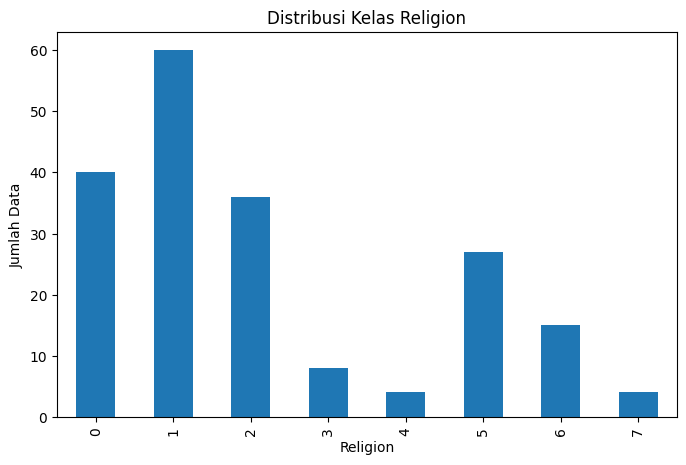

In [6]:
plt.figure(figsize=(8,5))
df["religion"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribusi Kelas Religion")
plt.xlabel("Religion")
plt.ylabel("Jumlah Data")

plt.savefig("distribusi_religion.png", dpi=300, bbox_inches="tight")
plt.show()

VISUALISASI 2 Boxplot Area dan Population

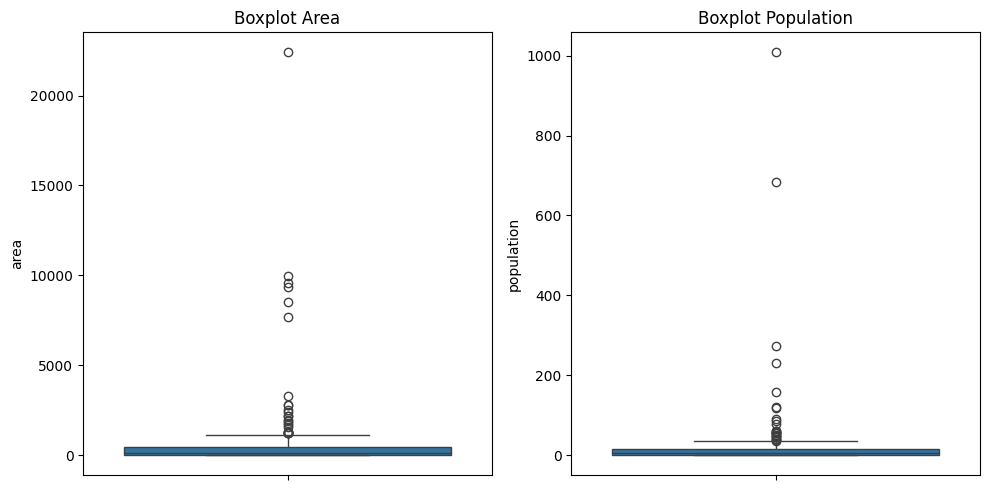

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y=df["area"])
plt.title("Boxplot Area")

plt.subplot(1,2,2)
sns.boxplot(y=df["population"])
plt.title("Boxplot Population")

plt.tight_layout()
plt.savefig("boxplot_area_population.png", dpi=300, bbox_inches="tight")
plt.show()

VISUALISASI 3 Heatmap Korelasi Fitur Numerik

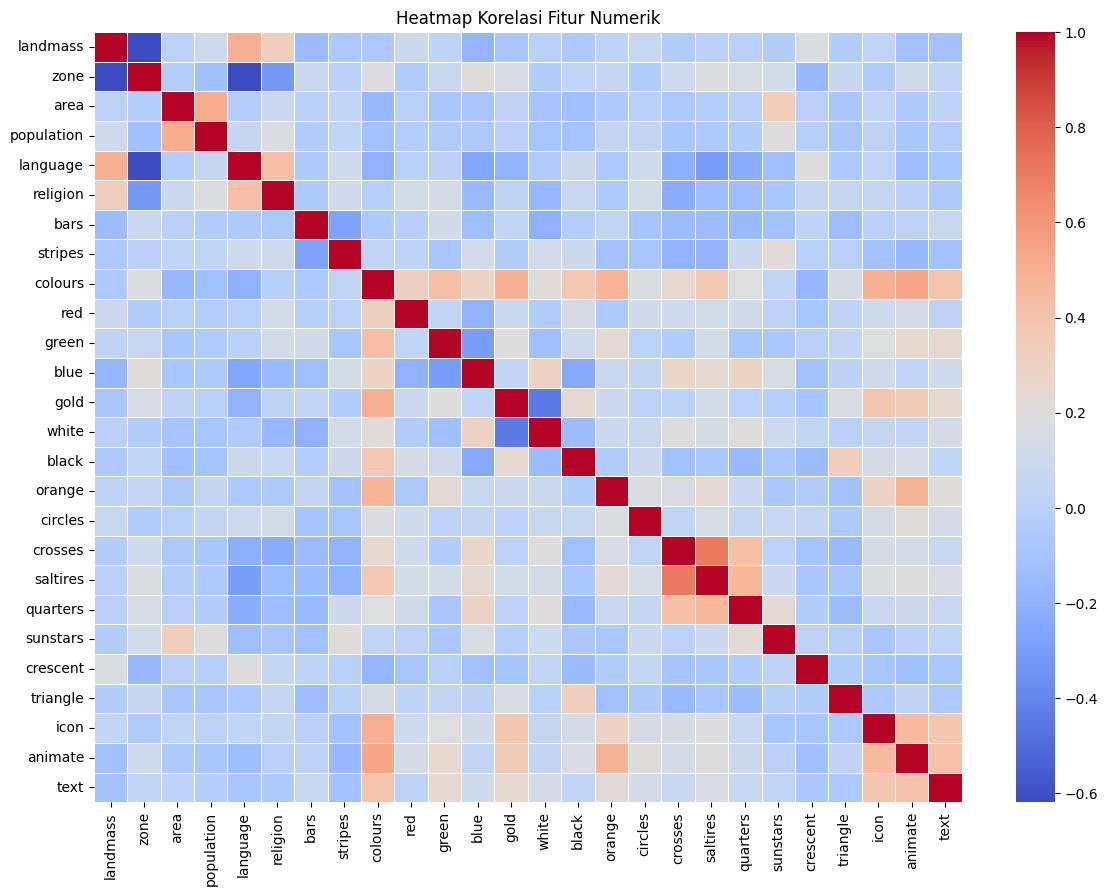

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include="number").corr(),
            cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik")
plt.savefig("heatmap_korelasi.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
# ===============================
# 1. HANDLING MISSING VALUES
# ===============================
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

print("\nMissing Values per Kolom:")
print(pd.DataFrame({
    "Missing Count": missing_values,
    "Missing (%)": missing_percent
}))

# Karena tidak ada missing values, tidak dilakukan imputasi

# ===============================
# 2. CEK DUPLICATE DATA
# ===============================
duplicate_count = df.duplicated().sum()
print("\nJumlah data duplikat:", duplicate_count)

# Jika ada duplikat (opsional)
df = df.drop_duplicates()

# ===============================
# 3. HANDLING OUTLIERS (IQR - ANALISIS SAJA)
# ===============================
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

print("\nJumlah Outliers per Fitur:")
for k, v in outlier_summary.items():
    if v > 0:
        print(f"{k}: {v}")

# Catatan:
# Outliers TIDAK dihapus karena merepresentasikan kondisi nyata negara

# ===============================
# 4. DATA TYPE CONVERSION
# ===============================
# Drop kolom name (identifier, tidak informatif)
df_model = df.drop(columns=["name"])

# Target
y = df_model["religion"]

# Fitur
X = df_model.drop(columns=["religion"])

# ===============================
# 5. PREPROCESSING PIPELINE
# ===============================

# Kategorikal (encoded)
categorical_cols = ["mainhue", "topleft", "botright"]

# Numerik
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# ===============================
# 6. APPLY PREPROCESSING
# ===============================
X_processed = preprocessor.fit_transform(X)

print("\nPreprocessing selesai")
print("Shape data setelah preprocessing:", X_processed.shape)

# ===============================
# 7. RINGKASAN AKHIR
# ===============================
print("\nRingkasan Data Cleaning:")
print("- Missing Values: Tidak ada")
print("- Duplikasi: Tidak ada")
print("- Outliers: Ada (dipertahankan)")
print("- Encoding & Scaling: Berhasil")


Missing Values per Kolom:
            Missing Count  Missing (%)
name                    0          0.0
landmass                0          0.0
zone                    0          0.0
area                    0          0.0
population              0          0.0
language                0          0.0
religion                0          0.0
bars                    0          0.0
stripes                 0          0.0
colours                 0          0.0
red                     0          0.0
green                   0          0.0
blue                    0          0.0
gold                    0          0.0
white                   0          0.0
black                   0          0.0
orange                  0          0.0
mainhue                 0          0.0
circles                 0          0.0
crosses                 0          0.0
saltires                0          0.0
quarters                0          0.0
sunstars                0          0.0
crescent                0          0.

In [10]:
# ===============================
# TARGET DAN FITUR
# ===============================
y = df_model["religion"]
X = df_model.drop(columns=["religion"])

# ===============================
# PREPROCESSING
# ===============================
X_processed = preprocessor.fit_transform(X)

print("Shape X_processed:", X_processed.shape)

# ===============================
# DATA SPLITTING
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Shape X_processed: (194, 48)
Training samples: 155
Test samples: 39


In [11]:
# Inisialisasi model Naive Bayes
model_baseline = GaussianNB()
# Training model
model_baseline.fit(X_train, y_train)
# Prediksi data test
y_pred_baseline = model_baseline.predict(X_test)
# Evaluasi awal (akurasi)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Akurasi Naive Bayes (Baseline):", accuracy_baseline)

Akurasi Naive Bayes (Baseline): 0.3076923076923077


In [12]:
# Inisialisasi model Random Forest
model_advanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
# Training model
model_advanced.fit(X_train, y_train)
# Prediksi data test
y_pred_advanced = model_advanced.predict(X_test)
# Evaluasi awal (akurasi)
accuracy_advanced = accuracy_score(y_test, y_pred_advanced)
print("Akurasi Random Forest:", accuracy_advanced)

Akurasi Random Forest: 0.6410256410256411


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical

# Get input dimensions and number of classes from preprocessed data
input_dim = X_train.shape[1]
num_classes = len(y.unique())

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# 1. Mendefinisikan Model dengan Dropout
model = models.Sequential([
    # Flatten layer is not needed as X_train is already 2D (batch_size, features).
    # The input_shape should be provided to the first Dense layer.
    layers.Dense(512, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.5), # Mematikan 50% neuron secara acak untuk mencegah overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3), # Tambahan dropout di layer kedua
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2. Menyiapkan Early Stopping
# Monitor 'val_loss', jika tidak turun selama 3 epoch (patience), training berhenti.
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True # Mengembalikan bobot model ke performa terbaik
)

# 3. Training dengan Callback
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=50, # Bisa diset tinggi karena ada Early Stopping
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.1188 - loss: 2.0891 - val_accuracy: 0.4103 - val_loss: 1.7084
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4202 - loss: 1.6002 - val_accuracy: 0.4103 - val_loss: 1.5996
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4839 - loss: 1.3701 - val_accuracy: 0.4359 - val_loss: 1.5189
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5322 - loss: 1.3051 - val_accuracy: 0.5641 - val_loss: 1.4548
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5365 - loss: 1.2259 - val_accuracy: 0.5385 - val_loss: 1.4422
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6491 - loss: 1.0644 - val_accuracy: 0.5128 - val_loss: 1.4442
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6923 - loss: 0.9737 - val_accuracy: 0.5385 - val_loss: 1.4588
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6647 - loss: 0.9170 - val_accuracy: 0.5641 - val_loss: 1.4864

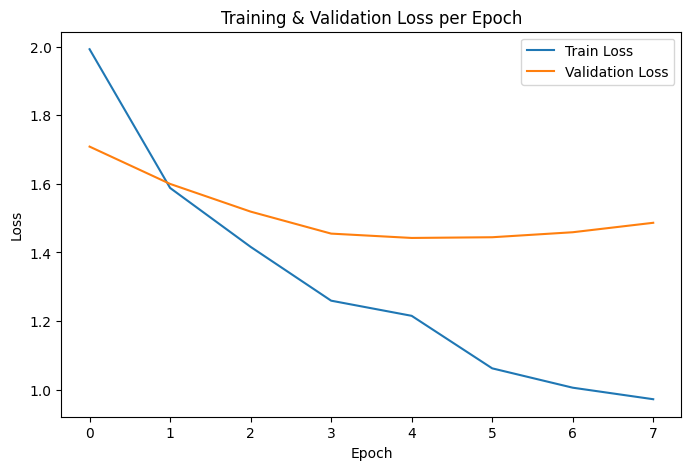

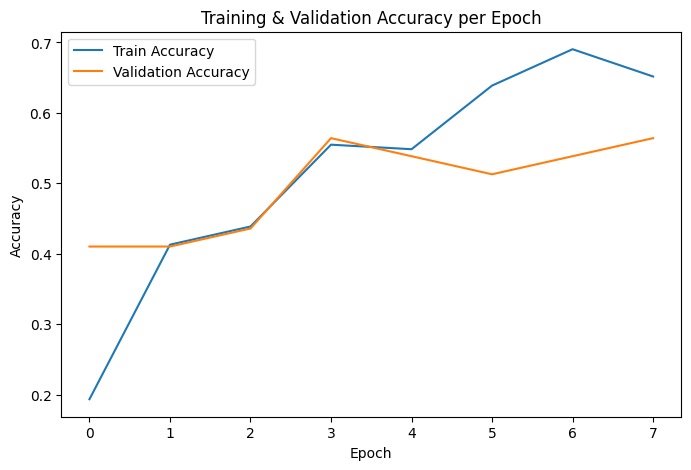

Analisis Training:
Overfitting: Ya
Converge: Tidak
Perlu lebih banyak epoch: Tidak


In [16]:
# ===============================
# Plot Loss
# ===============================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ===============================
# Plot Accuracy
# ===============================
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ===============================
# Analisis Overfitting & Convergence
# ===============================
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])
train_acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])

# Overfitting sederhana: jika val_loss jauh lebih tinggi dari train_loss di akhir training
overfit_threshold = 0.05  # bisa disesuaikan
overfit = (val_loss[-1] - train_loss[-1]) > overfit_threshold

# Convergence: jika selisih val_loss antara 2 epoch terakhir < 0.01
converge = abs(val_loss[-1] - val_loss[-2]) < 0.01

# Kebutuhan lebih banyak epoch: jika model belum converge dan val_loss masih menurun signifikan
need_more_epoch = not converge and (val_loss[-2] - val_loss[-1] > 0.01)

print("Analisis Training:")
print("Overfitting:", "Ya" if overfit else "Tidak")
print("Converge:", "Ya" if converge else "Tidak")
print("Perlu lebih banyak epoch:", "Ya" if need_more_epoch else "Tidak")

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,418 (1.81 MB)

 Trainable params: 158,472 (619.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316,946 (1.21 MB)


===== Evaluasi Model: Naive Bayes ===
- Accuracy : 0.3077
- Precision: 0.2321
- Recall   : 0.2231
- F1-Score : 0.1960


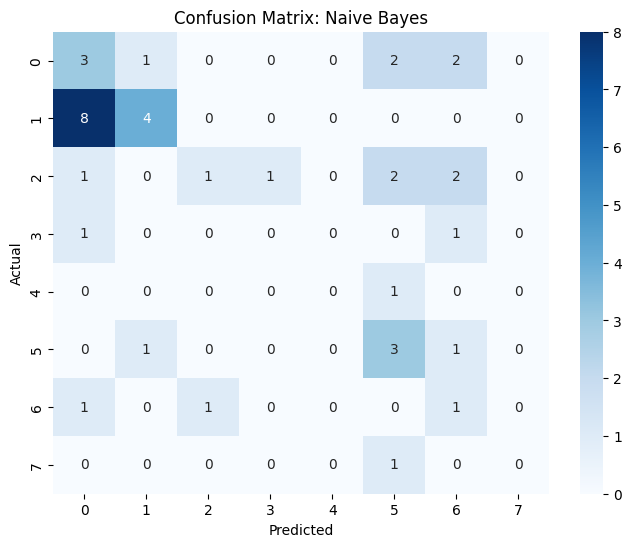


===== Evaluasi Model: Random Forest ===
- Accuracy : 0.6410
- Precision: 0.3778
- Recall   : 0.4016
- F1-Score : 0.3847


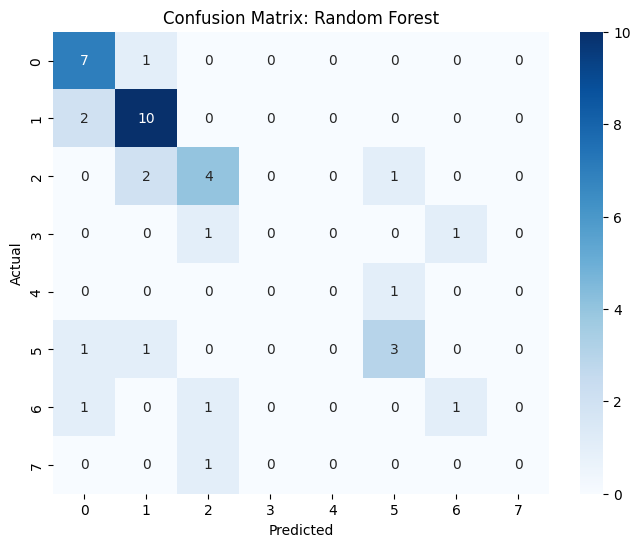

Shape of X_test_final before MLP prediction: (39, 48)
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

===== Evaluasi Model: MLP ===
- Accuracy : 0.5385
- Precision: 0.2736
- Recall   : 0.3183
- F1-Score : 0.2904


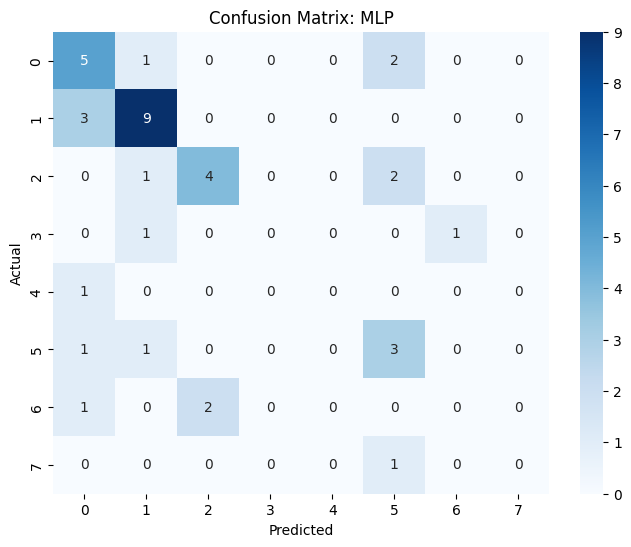

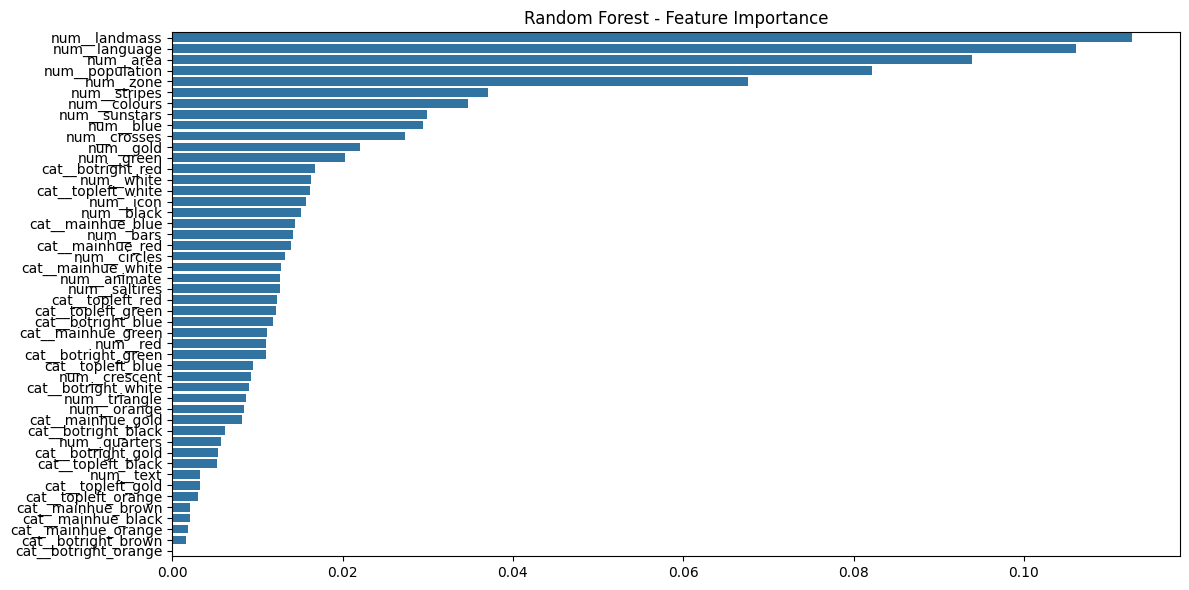


Contoh prediksi test set (Random Forest):
Actual: 3, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 5, Predicted: 1

Contoh prediksi test set (Naive Bayes):
Actual: 3, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 5
Actual: 1, Predicted: 0
Actual: 5, Predicted: 1

Contoh prediksi test set (MLP):
Actual: 3, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 5
Actual: 1, Predicted: 1
Actual: 5, Predicted: 1


In [24]:
# ===============================
# Fungsi untuk evaluasi & confusion matrix
# ===============================
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"\n===== Evaluasi Model: {name} ===")
    print(f"- Accuracy : {acc:.4f}")
    print(f"- Precision: {prec:.4f}")
    print(f"- Recall   : {rec:.4f}")
    print(f"- F1-Score : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

y = df_model["religion"]
X_raw = df_model.drop(columns=["religion"])

# Apply the preprocessor (defined in gsPF3OELkU_H)
X_processed_final = preprocessor.fit_transform(X_raw)

# Re-split the data to ensure X_train and X_test are fresh and consistent
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_processed_final,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ===============================
# 1. Evaluasi Naive Bayes
# ===============================
evaluate_model("Naive Bayes", y_test, y_pred_baseline)

# ===============================
# 2. Evaluasi Random Forest
# ===============================
evaluate_model("Random Forest", y_test, y_pred_advanced)

# ===============================
# 3. Evaluasi MLP
# ===============================
print(f"Shape of X_test_final before MLP prediction: {X_test_final.shape}")
y_pred_mlp = np.argmax(model.predict(X_test_final), axis=1)  # Use X_test_final
evaluate_model("MLP", y_test_final, y_pred_mlp)

# ===============================
# Feature Importance Random Forest
# ===============================
# To get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()
importances = model_advanced.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()

# ===============================
# Contoh prediksi test set
# ===============================
print("\nContoh prediksi test set (Random Forest):")
for i in range(5):
    print(f"Actual: {y_test_final.iloc[i]}, Predicted: {y_pred_advanced[i]}")

print("\nContoh prediksi test set (Naive Bayes):")
for i in range(5):
    print(f"Actual: {y_test_final.iloc[i]}, Predicted: {y_pred_baseline[i]}")

print("\nContoh prediksi test set (MLP):")
for i in range(5):
    print(f"Actual: {y_test_final.iloc[i]}, Predicted: {y_pred_mlp[i]}")

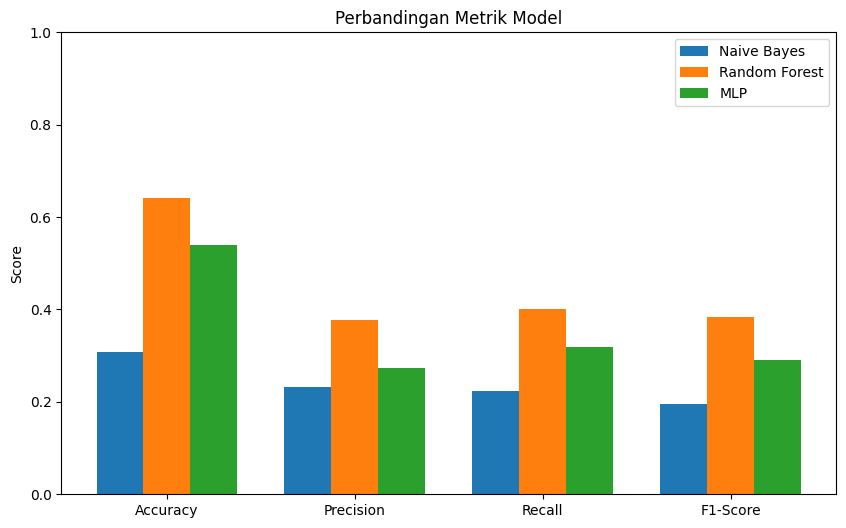

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics data from previous model evaluations
metrics_data = {
    "Model": ["Naive Bayes", "Random Forest", "MLP"],
    "Accuracy": [0.3077, 0.6410, 0.5385],
    "Precision": [0.2321, 0.3778, 0.2736],
    "Recall": [0.2231, 0.4016, 0.3183],
    "F1-Score": [0.1960, 0.3847, 0.2904]
}
df_metrics = pd.DataFrame(metrics_data)

metrics_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics_plot))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

# Membuat bar chart untuk setiap model
for i, model_name in enumerate(df_metrics["Model"]):
    ax.bar(x + i*bar_width, df_metrics.loc[i, metrics_plot], width=bar_width, label=model_name)

ax.set_xticks(x + bar_width * (len(df_metrics["Model"]) - 1) / 2) # Center the x-ticks
ax.set_xticklabels(metrics_plot)
ax.set_ylabel("Score")
ax.set_ylim(0,1)
ax.set_title("Perbandingan Metrik Model")
ax.legend()
plt.show()

In [30]:
# Daftar library
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras

# Menampilkan versi
print("Environment Versions:")
print(f"Python       : {sys.version.split()[0]}")
print(f"pandas       : {pd.__version__}")
print(f"numpy        : {np.__version__}")
print(f"matplotlib   : {matplotlib.__version__}")
print(f"seaborn      : {sns.__version__}")
print(f"scikit-learn : {sklearn.__version__}")
print(f"tensorflow   : {tf.__version__}")
print(f"keras        : {keras.__version__}")

Environment Versions:
Python       : 3.12.12
pandas       : 2.2.2
numpy        : 2.0.2
matplotlib   : 3.10.0
seaborn      : 0.13.2
scikit-learn : 1.6.1
tensorflow   : 2.19.0
keras        : 3.10.0


In [31]:
# ===============================
# 1. IMPORT LIBRARY
# ===============================
import joblib
import pickle
import tensorflow as tf

# ===============================
# 2. SAVE NAIVE BAYES MODEL
# ===============================
joblib.dump(model_nb, "naive_bayes_model.pkl")
print("✅ Naive Bayes model berhasil disimpan -> naive_bayes_model.pkl")

# ===============================
# 3. SAVE RANDOM FOREST MODEL
# ===============================
joblib.dump(model_rf, "random_forest_model.pkl")
print("✅ Random Forest model berhasil disimpan -> random_forest_model.pkl")

with open("mlp_model.pkl", "wb") as f:
    pickle.dump(model_dl, f)

print("✅ MLP model berhasil disimpan -> mlp_model.pkl")

# ===============================
# 4. (RECOMMENDED) SAVE MLP MODEL (.h5)
# ===============================
# Ini FORMAT PALING AMAN untuk Keras
model_dl.save("mlp_model.h5")
print("✅ MLP model juga disimpan -> mlp_model.h5 (RECOMMENDED)")

✅ Naive Bayes model berhasil disimpan -> naive_bayes_model.pkl
✅ Random Forest model berhasil disimpan -> random_forest_model.pkl
✅ MLP model berhasil disimpan -> mlp_model.pkl
✅ MLP model juga disimpan -> mlp_model.h5 (RECOMMENDED)
